# NetworkX

In [1]:
!python3 --version

Python 3.7.2


#### Importamos paqueterías

In [1]:
import networkx as nx

In [2]:
import numpy as np

In [3]:
from numpy import genfromtxt

In [4]:
import matplotlib.pyplot as plt

In [5]:
import csv

In [6]:
mydata = genfromtxt('/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv', delimiter=',')

In [7]:
print(mydata)

[[nan nan nan ... nan nan nan]
 [nan  0.  0. ...  0.  0.  0.]
 [nan  0.  0. ...  0.  0.  0.]
 ...
 [nan  0.  0. ...  0.  0.  0.]
 [nan  0.  0. ...  0.  0.  0.]
 [nan  0.  0. ...  0.  0.  0.]]


In [8]:
print(type(mydata))

<class 'numpy.ndarray'>


In [9]:
adjacency = mydata[1:,1:]
print(adjacency)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Lo que sigue no sirve...

In [10]:
def get_labels(csvfile):
    with open(csvfile) as f:
        reader = csv.reader(f)
        # get the first line in csv
        labels = reader.next()
    # return just the letters from pos 1 on
    return labels[1:]

def make_label_dict(labels):
    l = {}
    for i, label in enumerate(labels):
        l[i] = label
    return l

print get_labels('mycsv.csv')
print make_label_dict(get_labels('mycsv.csv'))

SyntaxError: invalid syntax (<ipython-input-10-adc1cb638dd3>, line 15)

In [ ]:
def get_labels(csvfile):
    with open(csvfile) as f:
        reader = csv.reader(f)
        # get the first line in csv
        labels = next(f)
    # return just the letters from pos 1 on
    return labels#[1:]

def make_label_dict(labels):
    l = {}
    for i, label in enumerate(labels):
        l[i] = label
    return l

print get_labels('/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv')
print make_label_dict(get_labels('/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv'))


In [ ]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

show_graph_with_labels(adjacency, make_label_dict(get_labels('/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv')))

In [ ]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    all_rows = range(0, adjacency_matrix.shape[0])
    for n in all_rows:
        gr.add_node(n)
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=900, labels=mylabels, with_labels=True)
    plt.show()

#### Cargamos datos. (Esto sí sirve)

Archivo csv con la matriz de vuelos de aeroméxico.

In [11]:
import pandas as pd
import networkx as nx
input_data = pd.read_csv('/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv', index_col=0)
G = nx.DiGraph(input_data.values)

In [12]:
input_data.head()

,ACA,BJX,BOG,BRU,CCS,CDG,CJS,CLQ,CME,CUL,...,TAP,TGZ,TIJ,TPQ,TRC,UIO,VER,VSA,YUL,VVI
ACA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BJX,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
BOG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
mylabels = list(input_data.columns)
print(mylabels)

['ACA', 'BJX', 'BOG', 'BRU', 'CCS', 'CDG', 'CJS', 'CLQ', 'CME', 'CUL', 'CUN', 'CUU', 'CVM', 'EZE', 'FAT', 'GDL', 'GRU', 'HAV', 'HMO', 'IAD', 'IAH', 'JAL', 'JFK', 'LAS', 'LAX', 'LHR', 'LIM', 'LPB', 'LZC', 'MAD', 'MCO', 'MEX', 'MIA', 'MID', 'MLM', 'MTY', 'MXL', 'MZT', 'NRT', 'OAX', 'ONT', 'ORD', 'PAZ', 'PDS', 'PHX', 'POS', 'PTY', 'PVG', 'PVR', 'PXM', 'REX', 'SCL', 'SFO', 'SJD', 'SJO', 'SMF', 'TAM', 'TAP', 'TGZ', 'TIJ', 'TPQ', 'TRC', 'UIO', 'VER', 'VSA', 'YUL', 'VVI']


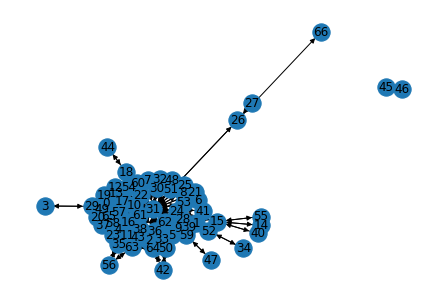

In [14]:
nx.draw(G, with_labels=True)

In [ ]:
#G = nx.Graph(spamreader)

In [ ]:
with open('/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile) #, delimiter=' ')
    
    #i = next(spamreader)
    
    
    print(i)
    
    #print(i)
    
    for row in spamreader:
        print(row)
    
    

In [ ]:
with open('/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/AM_matriz_du.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    
    next(spamreader)
    
    for row in spamreader:
        
        #quitar primer elemento
        del row[0]
        
        #print(', '.join(row))
        print(row)

In [ ]:
x = list(row)
result = np.array(x).astype("int")

In [ ]:
print(result)

In [ ]:
rows = [row for row in spamreader]

In [ ]:
print(rows)

In [ ]:
rest

#### Red

Creamos la red de Aeroméxico a partir de la matriz de adyacencia.

In [ ]:
nx.Graph()